# Precipitation Anomaly Maps Across Models and Experiments

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
from os import listdir


In [2]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=40, memory_limit="20GB", threads_per_worker=1, processes=True, dashboard_address=":8071")
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:34719' processes=40 threads=40, memory=745.06 GiB>

# Historical

In [3]:
spear_historical_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/SPEAR_historical_day_pr.zarr')
noresm2_historical_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/NorESM2-LM_historical_day_pr.zarr')
mri_historical_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/MRI-ESM2-0_historical_day_pr.zarr')
cesm2_historical_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/CESM2_historical_day_pr.zarr')


ensemble_members = []
existing_members = [1]
for i in existing_members:
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/CanESM5-1/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 16, 'lon': 32})['pr']
    ensemble_members.append(pr)
canesm5_historical_pr = xr.concat(ensemble_members, dim='member')
canesm5_historical_pr = canesm5_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in existing_members])

ensemble_members = []
existing_members = [1, 3, 4]
for i in existing_members:
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/EC-Earth3-AerChem/historical/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
    ensemble_members.append(pr)
ec_historical_pr = xr.concat(ensemble_members, dim='member')
ec_historical_pr= ec_historical_pr.assign_coords(member=[f'r{i}i1p1f1' for i in existing_members])

/tmp/ipykernel_2115862/1867727855.py:12: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 16. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 16, 'lon': 32})['pr']
/tmp/ipykernel_2115862/1867727855.py:12: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 32. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 16, 'lon': 32})['pr']
/tmp/ipykernel_2115862/1867727855.py:22: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_2115862/1867727855.py:22: UserWarning: The specified chunks separate the st

In [4]:
# Select years
spear_historical_pr = spear_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
noresm2_historical_pr = noresm2_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
mri_historical_pr = mri_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
cesm2_historical_pr = cesm2_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
canesm5_historical_pr = canesm5_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))
ec_historical_pr = ec_historical_pr.sel(time=slice('1961-01-01', '1990-12-31'))


In [5]:
# Unit Conversions
spear_historical_pr_mm_day = spear_historical_pr['pr'] * 86400
noresm2_historical_pr_mm_day = noresm2_historical_pr['pr'] * 86400
mri_historical_pr_mm_day = mri_historical_pr['pr'] * 86400
cesm2_historical_pr_mm_day = cesm2_historical_pr['pr'] * 86400
canesm5_historical_pr_mm_day = canesm5_historical_pr * 86400
ec_historical_pr_mm_day = ec_historical_pr * 86400

In [6]:
# Taking mean of time and member
spear_historical_pr_mm_day_ave = (spear_historical_pr_mm_day.mean('time'))
spear_1961_1990_pr = (spear_historical_pr_mm_day_ave.mean(dim ='member'))
noresm2_historical_pr_mm_day_ave = (noresm2_historical_pr_mm_day.mean('time'))
noresm2_1961_1990_pr = (noresm2_historical_pr_mm_day_ave.mean('member'))
mri_historical_pr_mm_day_ave = (mri_historical_pr_mm_day.mean('time'))
mri_1961_1990_pr = (mri_historical_pr_mm_day_ave.mean('member'))
cesm2_historical_pr_mm_day_ave = (cesm2_historical_pr_mm_day.mean('time'))
cesm2_1961_1990_pr = (cesm2_historical_pr_mm_day_ave.mean('member'))
canesm5_historical_pr_mm_day_ave = (canesm5_historical_pr_mm_day.mean('time'))
canesm5_1961_1990_pr = (canesm5_historical_pr_mm_day_ave.mean('member'))
ec_historical_pr_mm_day_ave = (ec_historical_pr_mm_day.mean('time'))
ec_1961_1990_pr = (ec_historical_pr_mm_day_ave.mean('member'))

spear_1961_1990_pr = spear_1961_1990_pr.compute()
noresm2_1961_1990_pr = noresm2_1961_1990_pr.compute()
mri_1961_1990_pr = mri_1961_1990_pr.compute()
cesm2_1961_1990_pr = cesm2_1961_1990_pr.compute()
canesm5_1961_1990_pr = canesm5_1961_1990_pr.compute()
ec_1961_1990_pr = ec_1961_1990_pr.compute()

In [7]:
# Multimodel mean 
target_grid = canesm5_1961_1990_pr  # coursest model

# Regrid all others to match
spear_regridded = spear_1961_1990_pr.interp(lat=target_grid.lat, lon=target_grid.lon)
noresm2_regridded = noresm2_1961_1990_pr.interp(lat=target_grid.lat, lon=target_grid.lon)
mri_regridded = mri_1961_1990_pr.interp(lat=target_grid.lat, lon=target_grid.lon)
cesm2_regridded = cesm2_1961_1990_pr.interp(lat=target_grid.lat, lon=target_grid.lon)
canesm5_regridded = canesm5_1961_1990_pr
ec_regridded = ec_1961_1990_pr.interp(lat=target_grid.lat, lon=target_grid.lon)

model_means = [spear_regridded, mri_regridded, noresm2_regridded, cesm2_regridded, canesm5_regridded, ec_regridded]
all_models = xr.concat(model_means, dim='model')
all_models = all_models.assign_coords(model=['SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'CanESM5-1','EC-Earth3-AerChem'])
multimodel_mean = all_models.mean(dim='model')

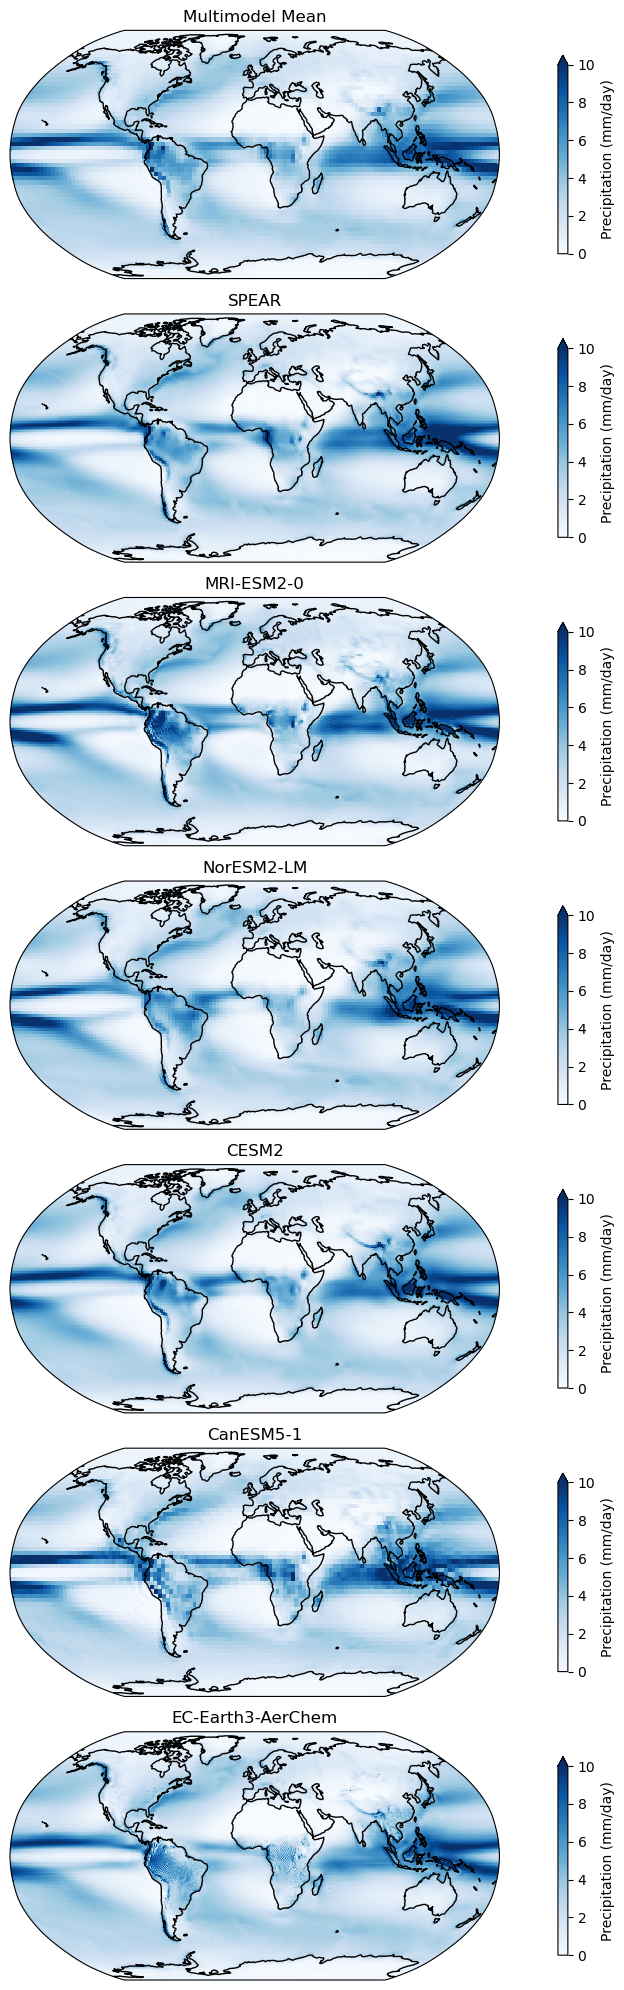

In [8]:
# Create figure with 7 rows, 1 column
fig, axes = plt.subplots(7, 1, figsize=(12, 20), 
                         subplot_kw={'projection': ccrs.Robinson()})

# List of data and labels
data_list = [
    multimodel_mean,
    spear_1961_1990_pr,
    mri_1961_1990_pr,
    noresm2_1961_1990_pr,
    cesm2_1961_1990_pr,
    canesm5_1961_1990_pr,
    ec_1961_1990_pr
]

labels = ['Multimodel Mean', 'SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 
          'CESM2', 'CanESM5-1', 'EC-Earth3-AerChem']

# Plot each one
for i, (data, label) in enumerate(zip(data_list, labels)):
    ax = axes[i]
    data.plot(ax=ax, transform=ccrs.PlateCarree(), 
              vmin=0, vmax=10,
              cmap='Blues',
              cbar_kwargs={'shrink': 0.8, 'label': 'Precipitation (mm/day)'})
    ax.coastlines()
    ax.set_title(label)
    ax.set_global()  # Shows the full globe in Robinson projection

plt.tight_layout()
plt.savefig('historical_precip.png', dpi=300, bbox_inches='tight')
plt.show()

# SSP370 Anomaly

In [ ]:
model_names = ['SPEAR', 'NorESM2-LM', 'MRI-ESM2-0', 'CESM2', 'CanESM5-1', 'EC-Earth3-AerChem']
data_paths = {'SPEAR': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/SPEAR_ssp370_day_pr.zarr',
              'NorESM2-LM': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/NorESM2-LM_ssp370_day_pr.zarr',
              'MRI-ESM2-0': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/MRI-ESM2-0_ssp370_day_pr.zarr',
              'CESM2': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/CESM2_ssp370_day_pr.zarr',
              'CanESM5-1': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/CanESM5-1_ssp370_day_pr.zarr', 
              'EC-Earth3-AerChem': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/EC-Earth3-AerChem_ssp370_day_pr.zarr'}

def process_model_pr(zarr_path, start_year=2041, end_year=2050):
    ds = xr.open_zarr(zarr_path)
    ds_sliced = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    pr_converted = ds_sliced['pr'] * 86400
    pr_mean = pr_converted.mean(dim=['time', 'member'])
    return pr_mean.compute()

# Process all models
processed_list = []
processed_data = {}  # Add this dictionary
for model_name in model_names:
    print(f"Processing {model_name}...")
    pr_data = process_model_pr(data_paths[model_name])
    processed_list.append(pr_data)
    processed_data[model_name] = pr_data  # Store in dictionary too

# Now you can access individual models
spear_2041_2050_ssp370_pr = processed_data['SPEAR']
noresm2_2041_2050_ssp370_pr = processed_data['NorESM2-LM']
mri_2041_2050_ssp370_pr = processed_data['MRI-ESM2-0']
cesm2_2041_2050_ssp370_pr = processed_data['CESM2']
canesm5_2041_2050_ssp370_pr = processed_data['CanESM5-1']
ec_2041_2050_ssp370_pr = processed_data['EC-Earth3-AerChem']


Processing SPEAR...


Processing NorESM2-LM...
Processing MRI-ESM2-0...
Processing CESM2...
Processing CanESM5-1...
Processing EC-Earth3-AerChem...


In [10]:
# anomalies
spear_ssp370_anom = (spear_2041_2050_ssp370_pr - spear_1961_1990_pr).compute()
noresm2_ssp370_anom = (noresm2_2041_2050_ssp370_pr - noresm2_1961_1990_pr).compute()
mri_ssp370_anom = (mri_2041_2050_ssp370_pr - mri_1961_1990_pr).compute()
cesm2_ssp370_anom = (cesm2_2041_2050_ssp370_pr - cesm2_1961_1990_pr).compute()
canesm5_ssp370_anom = (canesm5_2041_2050_ssp370_pr - canesm5_1961_1990_pr).compute()
ec_ssp370_anom = (ec_2041_2050_ssp370_pr - ec_1961_1990_pr).compute()

In [11]:
# using nearest neighbor when calculating anomaly - reindex historical to match ssp370
ec_1961_1990_pr_regrid = ec_1961_1990_pr.reindex(lat=ec_2041_2050_ssp370_pr.lat, lon=ec_2041_2050_ssp370_pr.lon, method='nearest')
ec_ssp370_anom = ec_2041_2050_ssp370_pr - ec_1961_1990_pr_regrid

In [12]:
# Multimodel mean of anomalies
target_grid = canesm5_ssp370_anom  # coarsest model

# Regrid all anomalies to match CanESM5
spear_anom_regridded = spear_ssp370_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
noresm2_anom_regridded = noresm2_ssp370_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
mri_anom_regridded = mri_ssp370_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
cesm2_anom_regridded = cesm2_ssp370_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
canesm5_anom_regridded = canesm5_ssp370_anom  # already on the target grid
ec_anom_regridded = ec_ssp370_anom.interp(lat=target_grid.lat, lon=target_grid.lon)

anomaly_means = [spear_anom_regridded, mri_anom_regridded, noresm2_anom_regridded, 
                 cesm2_anom_regridded, canesm5_anom_regridded, ec_anom_regridded]
all_anomalies = xr.concat(anomaly_means, dim='model')
all_anomalies = all_anomalies.assign_coords(model=['SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'CanESM5-1', 'EC-Earth3-AerChem'])
multimodel_mean_ssp370_anomaly = all_anomalies.mean(dim='model')

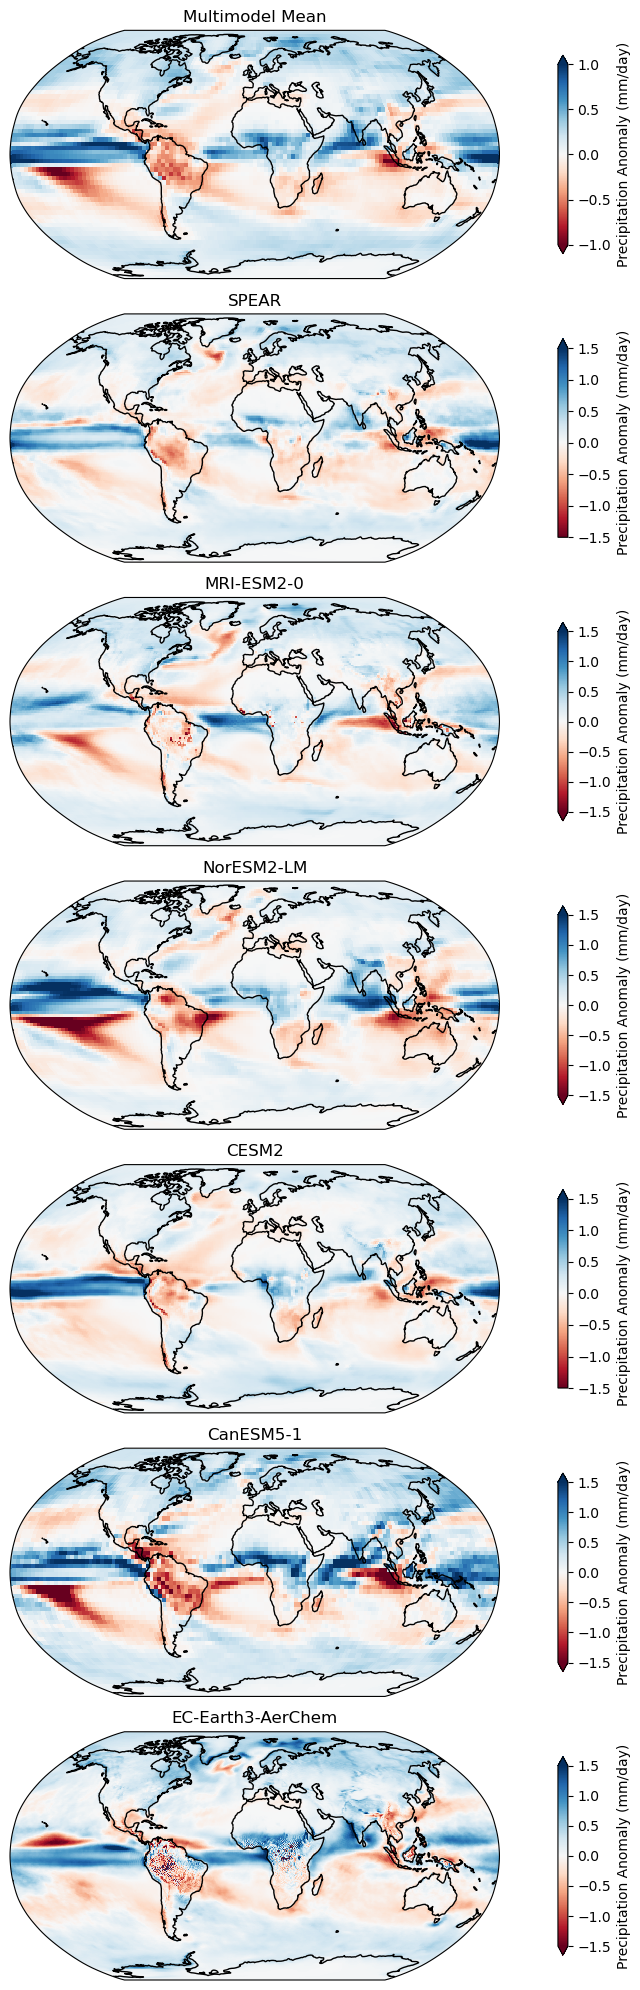

In [ ]:
# Create figure with 7 rows, 1 column
fig, axes = plt.subplots(7, 1, figsize=(12, 20), 
                         subplot_kw={'projection': ccrs.Robinson()})

# List of data and labels
data_list = [
    multimodel_mean_ssp370_anomaly,
    spear_ssp370_anom,
    mri_ssp370_anom,
    noresm2_ssp370_anom,
    cesm2_ssp370_anom,
    canesm5_ssp370_anom,
    ec_ssp370_anom
]

labels = ['Multimodel Mean', 'SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 
          'CESM2', 'CanESM5-1', 'EC-Earth3-AerChem']

# Plot each one
for i, (data, label) in enumerate(zip(data_list, labels)):
    ax = axes[i]
    vmin, vmax = -1.5, 1.5
    
    data.plot(ax=ax, transform=ccrs.PlateCarree(), 
              vmin=vmin, vmax=vmax,
              cmap='RdBu',
              cbar_kwargs={'shrink': 0.8, 'label': 'Precipitation Anomaly (mm/day)'})
    ax.coastlines()
    ax.set_title(label)
    ax.set_global()  

plt.tight_layout()
plt.savefig('precipitation_ssp370_anomalies.png', dpi=300, bbox_inches='tight')
plt.show()

# SSP126 Anomaly

In [ ]:
# Loading Data
spear_ssp126_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/SPEAR_ssp126_day_pr.zarr')
noresm2_ssp126_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/NorESM2-LM_ssp126_day_pr.zarr')
mri_ssp126_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/MRI-ESM2-0_ssp126_day_pr.zarr')
cesm2_ssp126_pr = xr.open_zarr('/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/CESM2_ssp126_day_pr.zarr')


# No CanESM5-1 data

ensemble_members = []
existing_members = [1, 4, 5, 6, 8 ,9]
for i in existing_members:
    directory = f'/home/persad_research/SIMULATION_DATA/DATA/RAMIP/EC-Earth3-AerChem/ssp126/r{i}i1p1f1/atm/day/pr/'
    paths = sorted([directory + f for f in listdir(directory) if '.nc' in f])
    pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
    ensemble_members.append(pr)
ec_ssp126_pr = xr.concat(ensemble_members, dim='member')
ec_ssp126_pr= ec_ssp126_pr.assign_coords(member=[f'r{i}i1p1f1' for i in existing_members])

/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 128. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the

/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 128. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 64. This could degrade performance. Instead, consider rechunking after loading.
  pr = xr.open_mfdataset(paths, chunks={'time': -1, 'lat': 64, 'lon': 128})['pr']
/tmp/ipykernel_2115862/1902006036.py:14: UserWarning: The specified chunks separate the

In [15]:
# Select years
spear_ssp126_pr = spear_ssp126_pr.sel(time=slice('2041-01-01', '2050-12-31'))
noresm2_ssp126_pr = noresm2_ssp126_pr.sel(time=slice('2041-01-01', '2050-12-31'))
mri_ssp126_pr = mri_ssp126_pr.sel(time=slice('2041-01-01', '2050-12-31'))
cesm2_ssp126_pr = cesm2_ssp126_pr.sel(time=slice('2041-01-01', '2050-12-31'))
ec_ssp126_pr = ec_ssp126_pr.sel(time=slice('2041-01-01', '2050-12-31'))

In [16]:
# Unit Conversions
spear_ssp126_pr_mm_day = spear_ssp126_pr['pr'] * 86400
noresm2_ssp126_pr_mm_day = noresm2_ssp126_pr['pr'] * 86400
mri_ssp126_pr_mm_day = mri_ssp126_pr['pr'] * 86400
cesm2_ssp126_pr_mm_day = cesm2_ssp126_pr['pr'] * 86400
ec_ssp126_pr_mm_day = ec_ssp126_pr * 86400

In [17]:
# Taking mean of time and member
spear_ssp126_pr_mm_day_ave = (spear_ssp126_pr_mm_day.mean('time'))
spear_2041_2050_pr = (spear_ssp126_pr_mm_day_ave.mean(dim ='member'))
noresm2_ssp126__pr_mm_day_ave = (noresm2_ssp126_pr_mm_day.mean('time'))
noresm2_2041_2050_pr = (noresm2_ssp126__pr_mm_day_ave.mean('member'))
mri_ssp126_pr_mm_day_ave = (mri_ssp126_pr_mm_day.mean('time'))
mri_2041_2050_pr = (mri_ssp126_pr_mm_day_ave.mean('member'))
cesm2_ssp126_pr_mm_day_ave = (cesm2_ssp126_pr_mm_day.mean('time'))
cesm2_2041_2050_pr = (cesm2_ssp126_pr_mm_day_ave.mean('member'))
ec_ssp126_pr_mm_day_ave = (ec_ssp126_pr_mm_day.mean('time'))
ec_2041_2050_pr = (ec_ssp126_pr_mm_day_ave.mean('member'))

spear_2041_2050_ssp126_pr = spear_2041_2050_pr.compute()
noresm2_2041_2050_ssp126_pr = noresm2_2041_2050_pr.compute()
mri_2041_2050_ssp126_pr = mri_2041_2050_pr.compute()
cesm2_2041_2050_ssp126_pr = cesm2_2041_2050_pr.compute()
ec_2041_2050_ssp126_pr = ec_2041_2050_pr.compute()

In [18]:
# anomalies
spear_ssp126_anom = (spear_2041_2050_ssp126_pr - spear_1961_1990_pr).compute()
noresm2_ssp126_anom = (noresm2_2041_2050_ssp126_pr - noresm2_1961_1990_pr).compute()
mri_ssp126_anom = (mri_2041_2050_ssp126_pr - mri_1961_1990_pr).compute()
cesm2_ssp126_anom = (cesm2_2041_2050_ssp126_pr - cesm2_1961_1990_pr).compute()
ec_ssp126_anom = (ec_2041_2050_ssp126_pr - ec_1961_1990_pr).compute()

In [ ]:
# using nearest neighbor when calculating anomaly - reindex historical to match ssp370
ec_1961_1990_pr_regrid = ec_1961_1990_pr.reindex(lat=ec_2041_2050_ssp126_pr.lat, lon=ec_2041_2050_ssp126_pr.lon, method='nearest')
ec_ssp126_anom = ec_2041_2050_ssp126_pr - ec_1961_1990_pr_regrid

In [20]:
# Multimodel mean of anomalies
target_grid = noresm2_ssp126_anom  # coarsest model

# Regrid all anomalies to match CanESM5
spear_anom_regridded = spear_ssp126_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
noresm2_anom_regridded = noresm2_ssp126_anom
mri_anom_regridded = mri_ssp126_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
cesm2_anom_regridded = cesm2_ssp126_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
ec_anom_regridded = ec_ssp126_anom.interp(lat=target_grid.lat, lon=target_grid.lon)

anomaly_means = [spear_anom_regridded, mri_anom_regridded, noresm2_anom_regridded, 
                 cesm2_anom_regridded, ec_anom_regridded]
all_anomalies = xr.concat(anomaly_means, dim='model')
all_anomalies = all_anomalies.assign_coords(model=['SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'EC-Earth3-AerChem'])
multimodel_mean_ssp126_anomaly = all_anomalies.mean(dim='model')

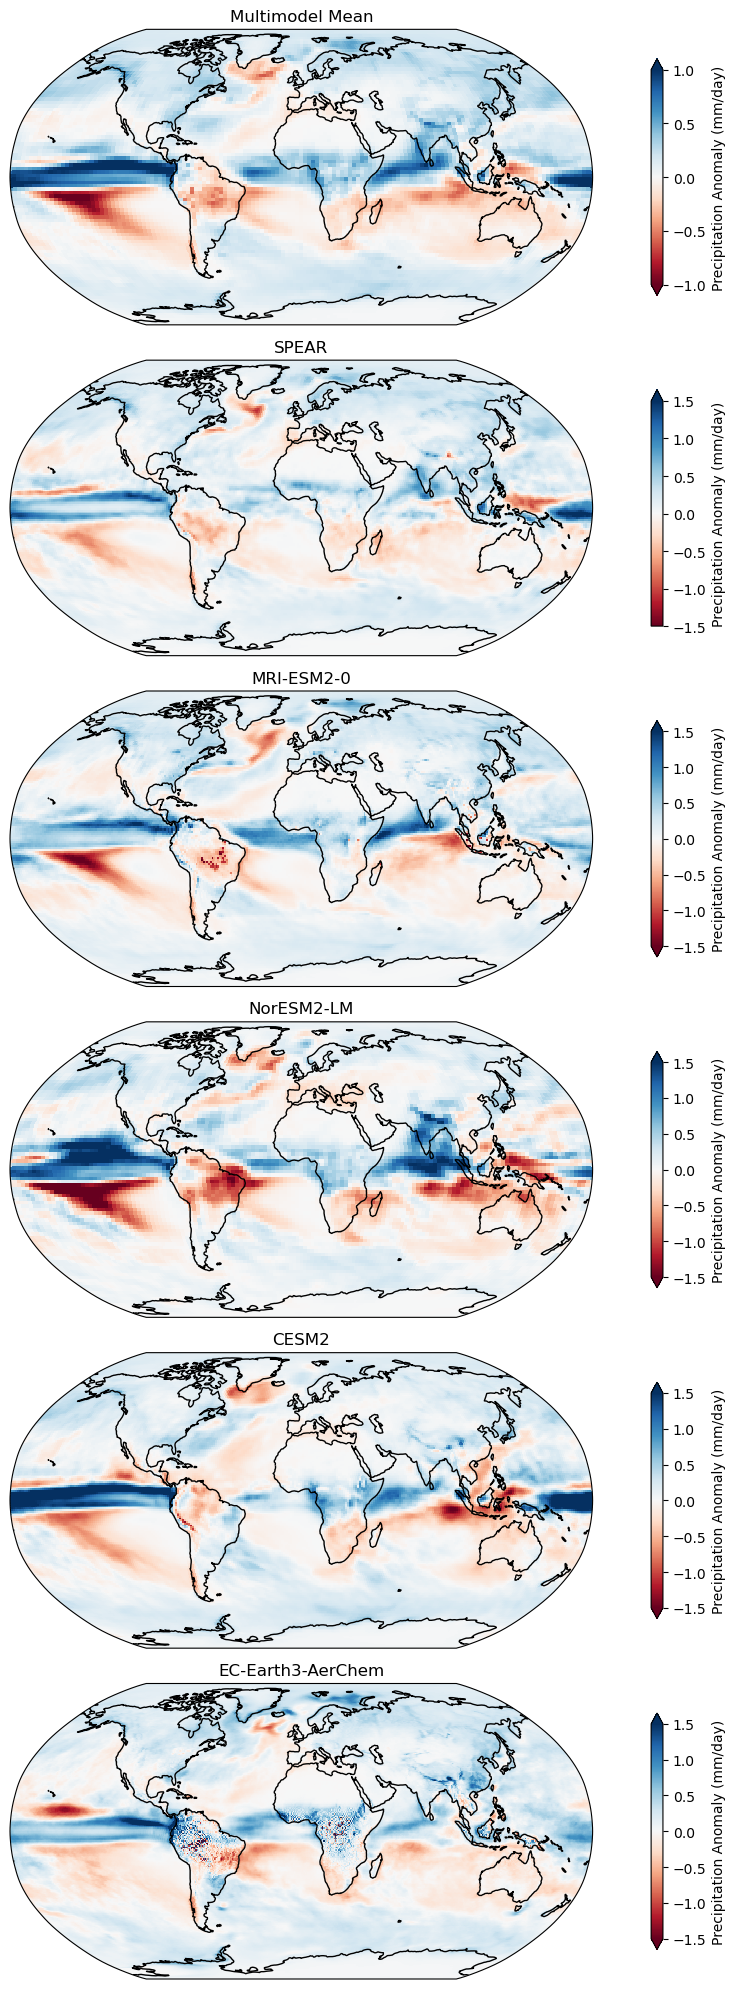

In [ ]:
# Create figure with 6 rows, 1 column
fig, axes = plt.subplots(6, 1, figsize=(12, 20), 
                         subplot_kw={'projection': ccrs.Robinson()})

# List of data and labels
data_list = [
    multimodel_mean_ssp126_anomaly,
    spear_ssp126_anom,
    mri_ssp126_anom,
    noresm2_ssp126_anom,
    cesm2_ssp126_anom,
    ec_ssp126_anom
]

labels = ['Multimodel Mean', 'SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 
          'CESM2', 'EC-Earth3-AerChem']

# Plot each one
for i, (data, label) in enumerate(zip(data_list, labels)):
    ax = axes[i]
    vmin, vmax = -1.5, 1.5
    
    data.plot(ax=ax, transform=ccrs.PlateCarree(), 
              vmin=vmin, vmax=vmax,
              cmap='RdBu',
              cbar_kwargs={'shrink': 0.8, 'label': 'Precipitation Anomaly (mm/day)'})
    ax.coastlines()
    ax.set_title(label)
    ax.set_global()  

plt.tight_layout()
plt.savefig('precipitation_ssp126_anomalies.png', dpi=300, bbox_inches='tight')
plt.show()

# SSP 370-126aer Anomaly

In [ ]:
# Loading Data
model_names = ['SPEAR', 'NorESM2-LM', 'MRI-ESM2-0', 'CESM2', 'CanESM5-1', 'EC-Earth3-AerChem']
data_paths = {'SPEAR': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/SPEAR_ssp370-126aer_day_pr.zarr',
              'NorESM2-LM': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/NorESM2-LM_ssp370-126aer_day_pr.zarr',
              'MRI-ESM2-0': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/MRI-ESM2-0_ssp370-126aer_day_pr.zarr',
              'CESM2': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/CESM2_ssp370-126aer_day_pr.zarr',
              'CanESM5-1': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/CanESM5-1_ssp370-126aer_day_pr.zarr', 
              'EC-Earth3-AerChem': '/home/persad_research/SIMULATION_DATA/ZARR/RAMIP/SIM_VARIABLES/EC-Earth3-AerChem_ssp370-126aer_day_pr.zarr'}

def process_model_pr(zarr_path, start_year=2041, end_year=2050):
    ds = xr.open_zarr(zarr_path)
    ds_sliced = ds.sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    pr_converted = ds_sliced['pr'] * 86400
    pr_mean = pr_converted.mean(dim=['time', 'member'])
    return pr_mean.compute()

# Process all models
processed_list = []
processed_data = {}  # Add this dictionary
for model_name in model_names:
    print(f"Processing {model_name}...")
    pr_data = process_model_pr(data_paths[model_name])
    processed_list.append(pr_data)
    processed_data[model_name] = pr_data  # Store in dictionary too

# Now you can access individual models
spear_2041_2050_ssp370_126aer_pr = processed_data['SPEAR']
noresm2_2041_2050_ssp370_126aer_pr = processed_data['NorESM2-LM']
mri_2041_2050_ssp370_126aer_pr = processed_data['MRI-ESM2-0']
cesm2_2041_2050_ssp370_126aer_pr = processed_data['CESM2']
canesm5_2041_2050_ssp370_126aer_pr = processed_data['CanESM5-1']
ec_2041_2050_ssp370_126aer_pr = processed_data['EC-Earth3-AerChem']

Processing SPEAR...
Processing NorESM2-LM...
Processing MRI-ESM2-0...
Processing CESM2...
Processing CanESM5-1...
Processing EC-Earth3-AerChem...


In [23]:
# anomalies
spear_ssp370_126aer_anom = (spear_2041_2050_ssp370_126aer_pr - spear_1961_1990_pr).compute()
noresm2_ssp370_126aer_anom = (noresm2_2041_2050_ssp370_126aer_pr - noresm2_1961_1990_pr).compute()
mri_ssp370_126aer_anom = (mri_2041_2050_ssp370_126aer_pr - mri_1961_1990_pr).compute()
cesm2_ssp370_126aer_anom = (cesm2_2041_2050_ssp370_126aer_pr - cesm2_1961_1990_pr).compute()
canesm5_ssp370_126aer_anom = (canesm5_2041_2050_ssp370_126aer_pr - canesm5_1961_1990_pr).compute()
ec_ssp370_126aer_anom = (ec_2041_2050_ssp370_126aer_pr - ec_1961_1990_pr).compute()

In [40]:
# using nearest neighbor when calculating anomaly - reindex historical to match ssp370
ec_1961_1990_pr_regrid = ec_1961_1990_pr.reindex(lat=ec_2041_2050_ssp370_126aer_pr.lat, lon=ec_2041_2050_ssp370_126aer_pr.lon, method='nearest')
ec_ssp126_anom = ec_2041_2050_ssp126_pr - ec_1961_1990_pr_regrid

In [41]:
# Multimodel mean of anomalies
target_grid = canesm5_ssp370_anom  # coarsest model

# Regrid all anomalies to match CanESM5
spear_anom_regridded = spear_ssp370_126aer_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
noresm2_anom_regridded = noresm2_ssp370_126aer_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
mri_anom_regridded = mri_ssp370_126aer_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
cesm2_anom_regridded = cesm2_ssp370_126aer_anom.interp(lat=target_grid.lat, lon=target_grid.lon)
canesm5_anom_regridded = canesm5_ssp370_126aer_anom  # already on the target grid
ec_anom_regridded = ec_ssp370_126aer_anom.interp(lat=target_grid.lat, lon=target_grid.lon)

anomaly_means = [spear_anom_regridded, mri_anom_regridded, noresm2_anom_regridded, 
                 cesm2_anom_regridded, canesm5_anom_regridded, ec_anom_regridded]
all_anomalies = xr.concat(anomaly_means, dim='model')
all_anomalies = all_anomalies.assign_coords(model=['SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 'CESM2', 'CanESM5-1', 'EC-Earth3-AerChem'])
multimodel_mean_ssp370_126aer_anomaly = all_anomalies.mean(dim='model')

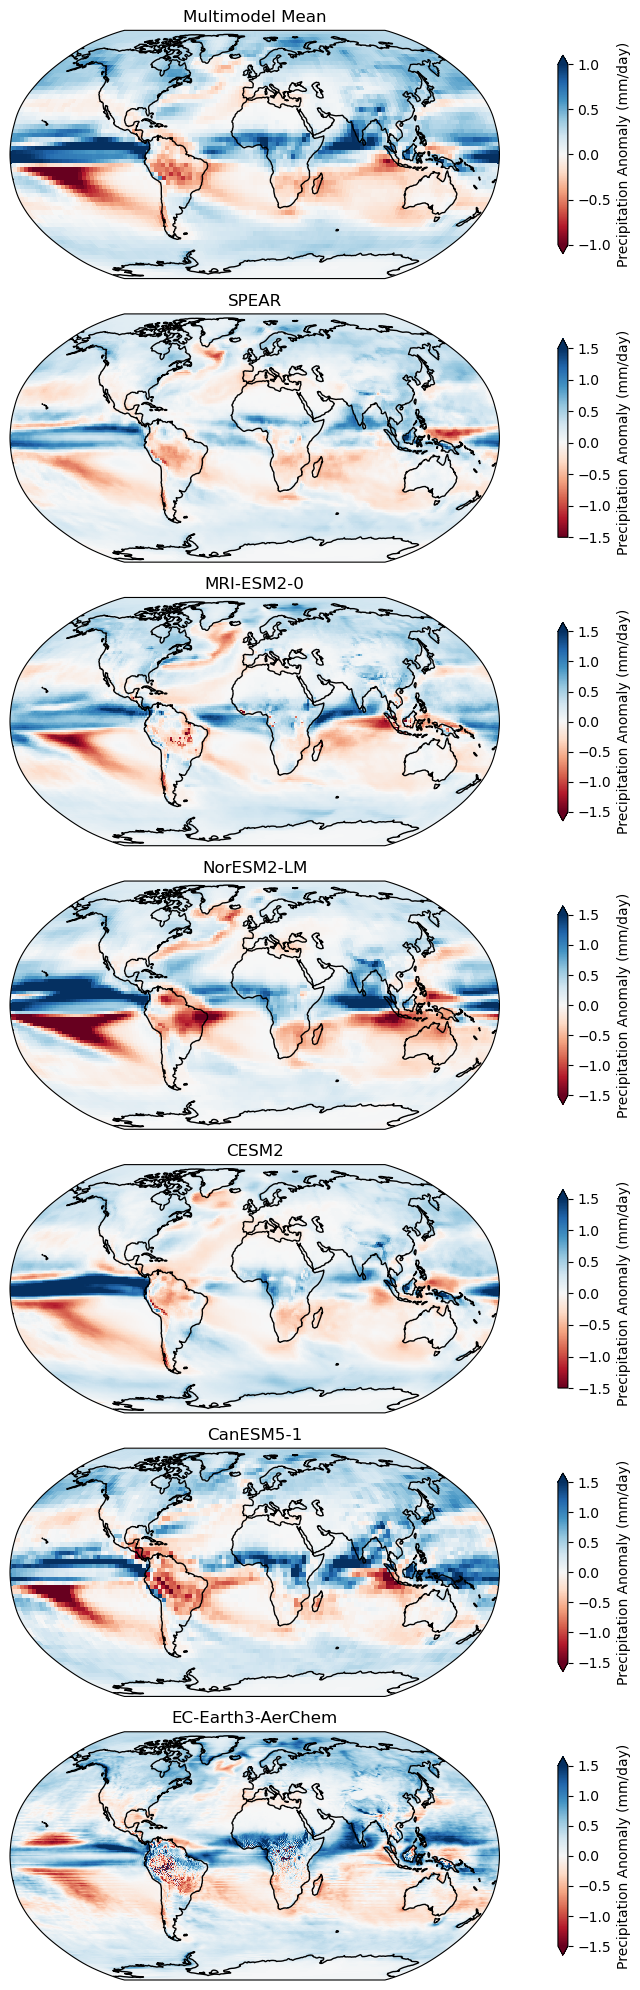

In [ ]:
# Create figure with 7 rows, 1 column
fig, axes = plt.subplots(7, 1, figsize=(12, 20), 
                         subplot_kw={'projection': ccrs.Robinson()})

# List of data and labels
data_list = [
    multimodel_mean_ssp370_126aer_anomaly,
    spear_ssp370_126aer_anom,
    mri_ssp370_126aer_anom,
    noresm2_ssp370_126aer_anom,
    cesm2_ssp370_126aer_anom,
    canesm5_ssp370_126aer_anom,
    ec_ssp370_126aer_anom
]

labels = ['Multimodel Mean', 'SPEAR', 'MRI-ESM2-0', 'NorESM2-LM', 
          'CESM2', 'CanESM5-1', 'EC-Earth3-AerChem']

# Plot each one
for i, (data, label) in enumerate(zip(data_list, labels)):
    ax = axes[i]
    vmin, vmax = -1.5, 1.5
    
    data.plot(ax=ax, transform=ccrs.PlateCarree(), 
              vmin=vmin, vmax=vmax,
              cmap='RdBu',
              cbar_kwargs={'shrink': 0.8, 'label': 'Precipitation Anomaly (mm/day)'})
    ax.coastlines()
    ax.set_title(label)
    ax.set_global()  

plt.tight_layout()
plt.savefig('precipitation_ssp370-ssp126aer_anomalies.png', dpi=300, bbox_inches='tight')
plt.show()

Historical EC-Earth:
Shape: (512, 512)
Any NaNs?: False
Min/Max: 0.000844825990498066 42.43489456176758

Future EC-Earth:
Shape: (256, 512)
Any NaNs?: False
Min/Max: 0.003921140916645527 46.951988220214844

EC-Earth anomaly:
Any NaNs?: True
Min/Max: -2.7816586494445747 4.798733712273767


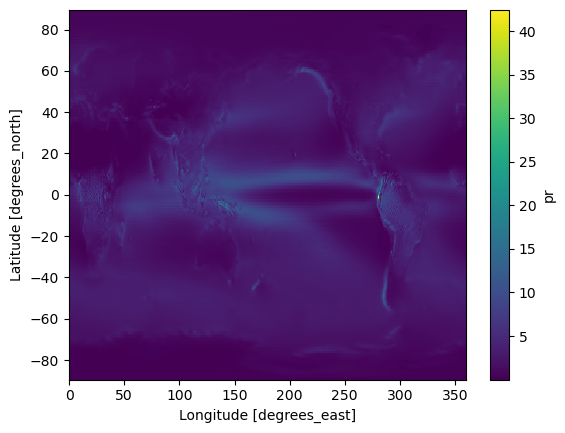

In [32]:
# Check the historical data
print("Historical EC-Earth:")
print("Shape:", ec_1961_1990_pr.shape)
print("Any NaNs?:", ec_1961_1990_pr.isnull().any().values)
print("Min/Max:", ec_1961_1990_pr.min().values, ec_1961_1990_pr.max().values)

# Check the future data
print("\nFuture EC-Earth:")
print("Shape:", ec_2041_2050_ssp370_126aer_pr.shape)
print("Any NaNs?:", ec_2041_2050_ssp370_126aer_pr.isnull().any().values)
print("Min/Max:", ec_2041_2050_ssp370_126aer_pr.min().values, ec_2041_2050_ssp370_126aer_pr.max().values)

# Check the anomaly
print("\nEC-Earth anomaly:")
print("Any NaNs?:", ec_ssp370_126aer_anom.isnull().any().values)
print("Min/Max:", ec_ssp370_126aer_anom.min().values, ec_ssp370_126aer_anom.max().values)

# Try plotting the historical period alone to see if it's already spotty
ec_1961_1990_pr.plot()

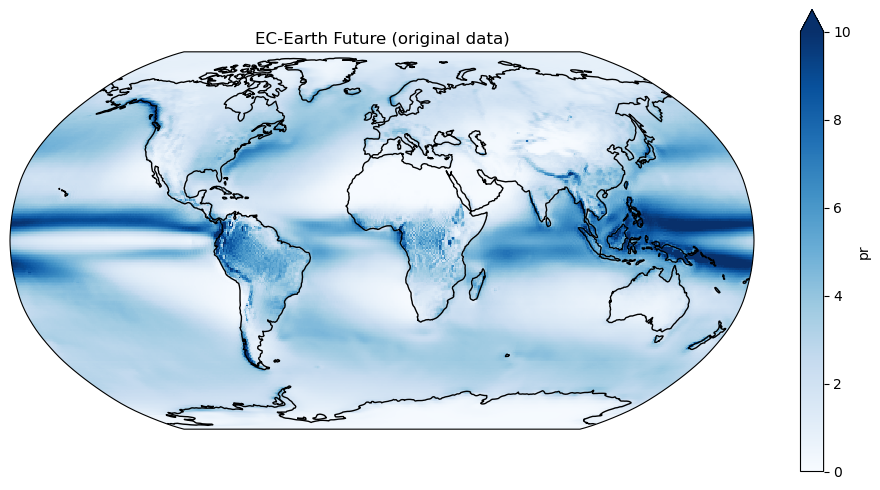

In [38]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(1, 1, figsize=(12, 6), 
                       subplot_kw={'projection': ccrs.Robinson()})

ec_2041_2050_ssp370_126aer_pr.plot(ax=ax, transform=ccrs.PlateCarree(),
                                     vmin=0, vmax=10, cmap='Blues')
ax.coastlines()
ax.set_global()
ax.set_title('EC-Earth Future (original data)')
plt.show()

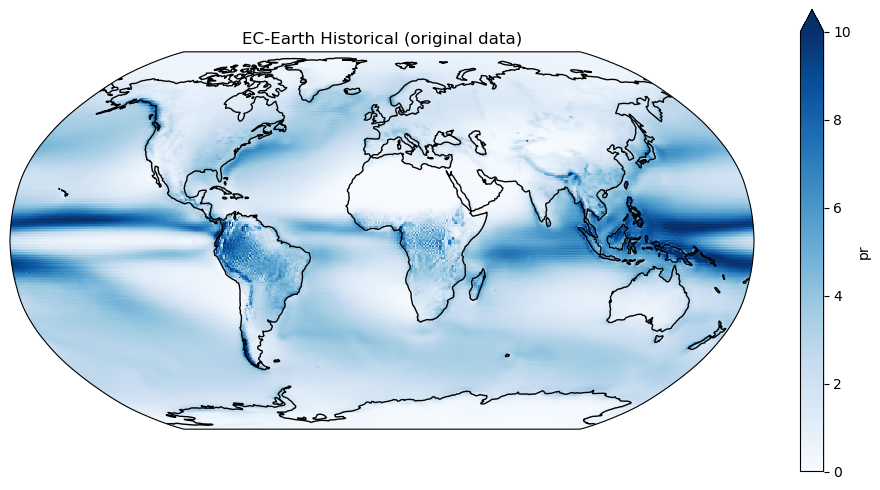

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), 
                       subplot_kw={'projection': ccrs.Robinson()})

ec_1961_1990_pr.plot(ax=ax, transform=ccrs.PlateCarree(),
                     vmin=0, vmax=10, cmap='Blues')
ax.coastlines()
ax.set_global()
ax.set_title('EC-Earth Historical (original data)')
plt.show()